In [44]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from nsimpkg.random_variables import NormalRV, MixNormalRV
from nsimpkg.gaussian_OAIS import AdaGrad_OAIS
from nsimpkg.mcsim import mcsim, rho
from nsimpkg.plotting import plot_contours, plotter, fill_z, plot_mse
np.random.seed(0)


plt.rcParams['figure.dpi'] = 300
m1 = np.array([3, 0])
m2 = np.array([-3, 0])
Sigma1 = np.array([[1, 0], [0, 1]])
Sigma2 = np.array([[1, 0], [0, 1]])

q = NormalRV(np.array([10, -10]), np.array([[40, 0], [0, 40]]))
pi = MixNormalRV([0.5, 0.5], [m1, m2], [Sigma1, Sigma2])

def phi(x):
    return (np.sum(np.abs(x) < 1, axis=0) == 2).astype(int)

N = 100
Niter = int(1e4)
alpha_AdaGrad = 1e-1
nexperiments = 100
results_array_AdaGrad = []
distribution_array_AdaGrad = []
for _ in range(nexperiments):
    r_AdaGrad, d_AdaGrad = AdaGrad_OAIS(phi, pi, q, N, Niter, alpha=alpha_AdaGrad)
    results_array_AdaGrad.append(r_AdaGrad)
    distribution_array_AdaGrad.append(d_AdaGrad)

  0%|          | 0/10000 [00:00<?, ?it/s]

100%|██████████| 10000/10000 [00:14<00:00, 707.21it/s]


In [58]:
import nsimpkg.plotting
# import reload function from importlib
from importlib import reload
reload(nsimpkg.plotting)
from nsimpkg.plotting import plotter

/Users/carlosperello/Desktop/M3R/nsimpkg/plotting.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.tight_layout()


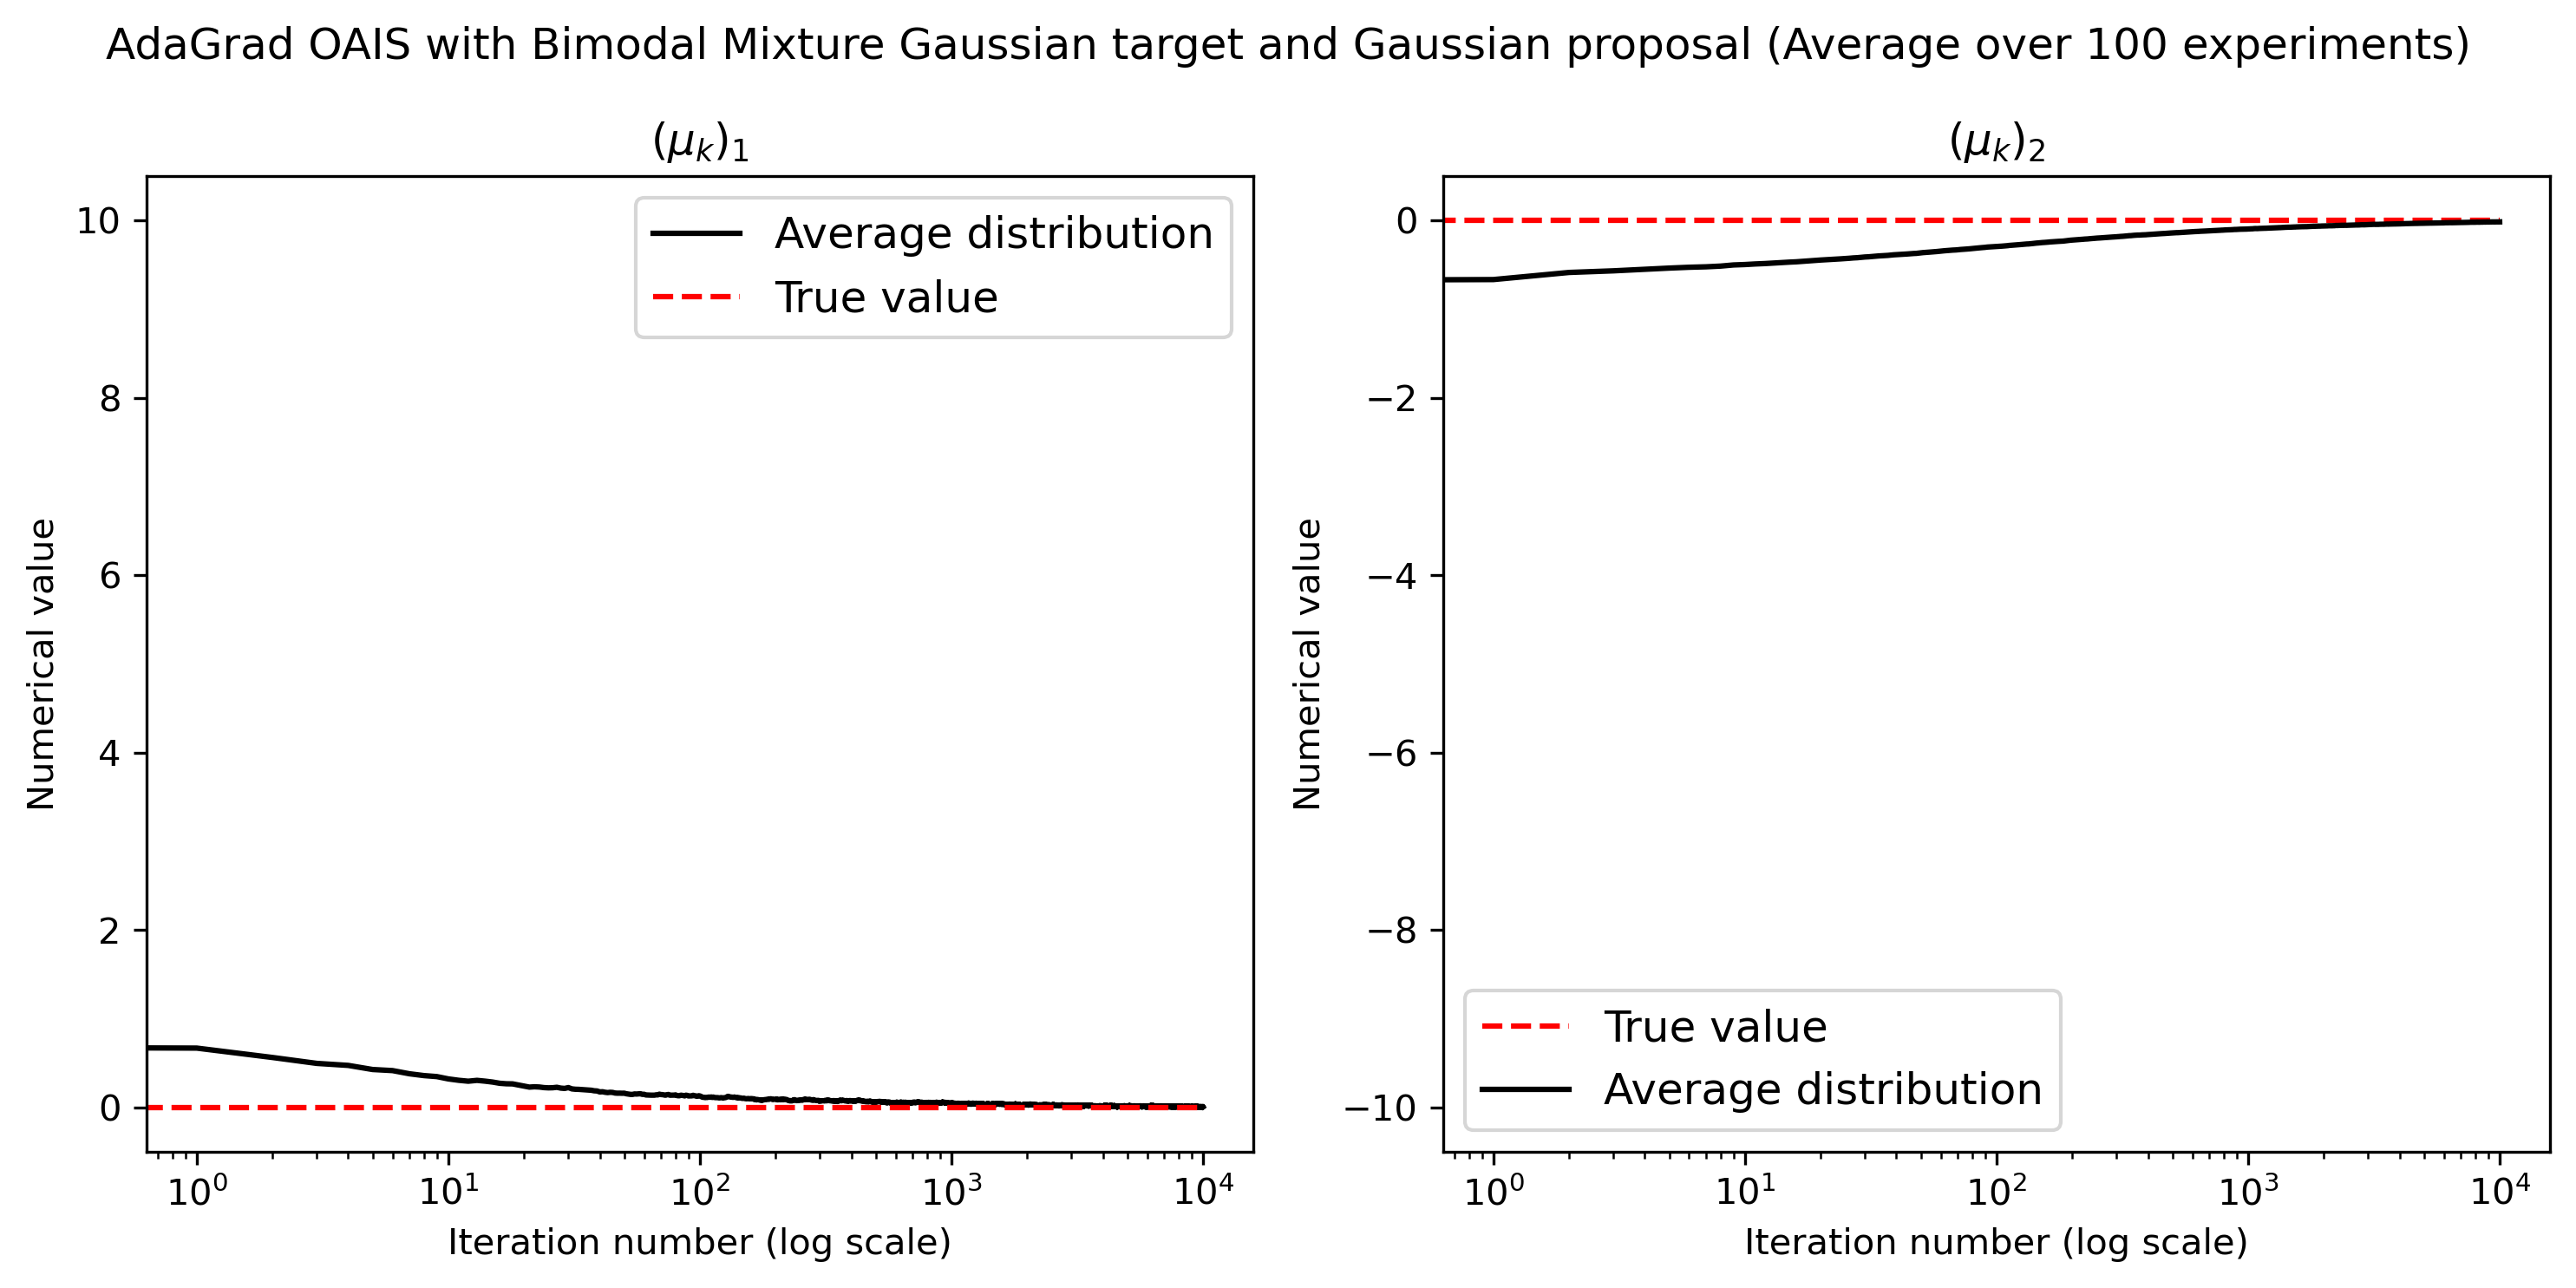

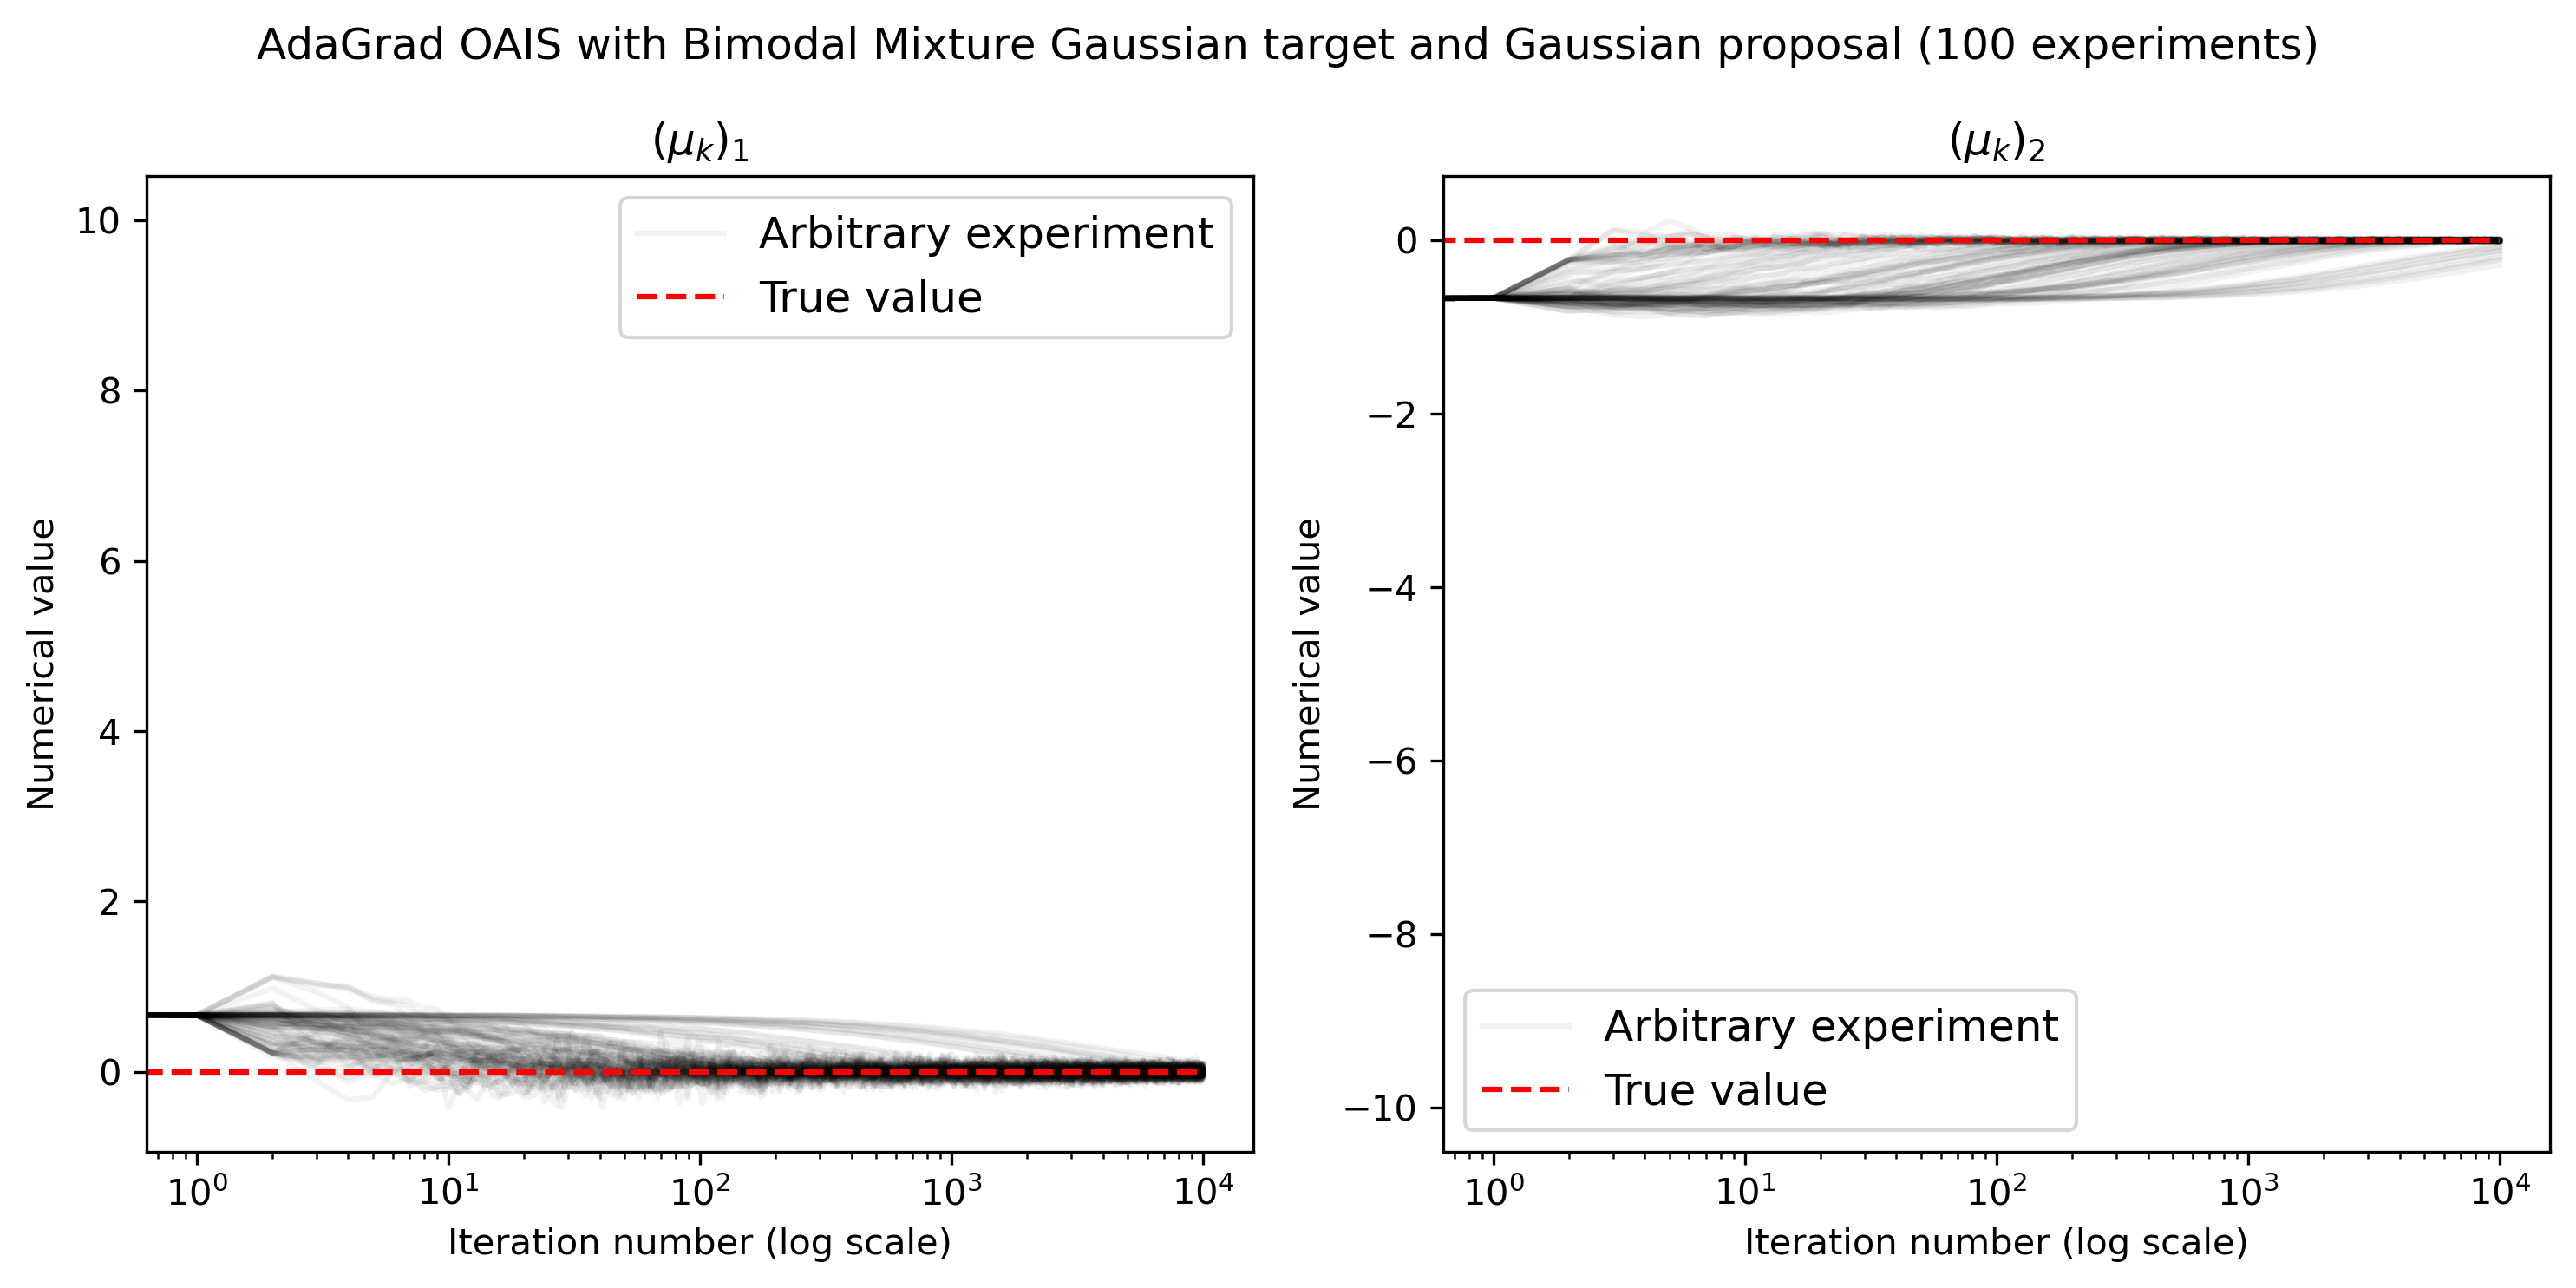

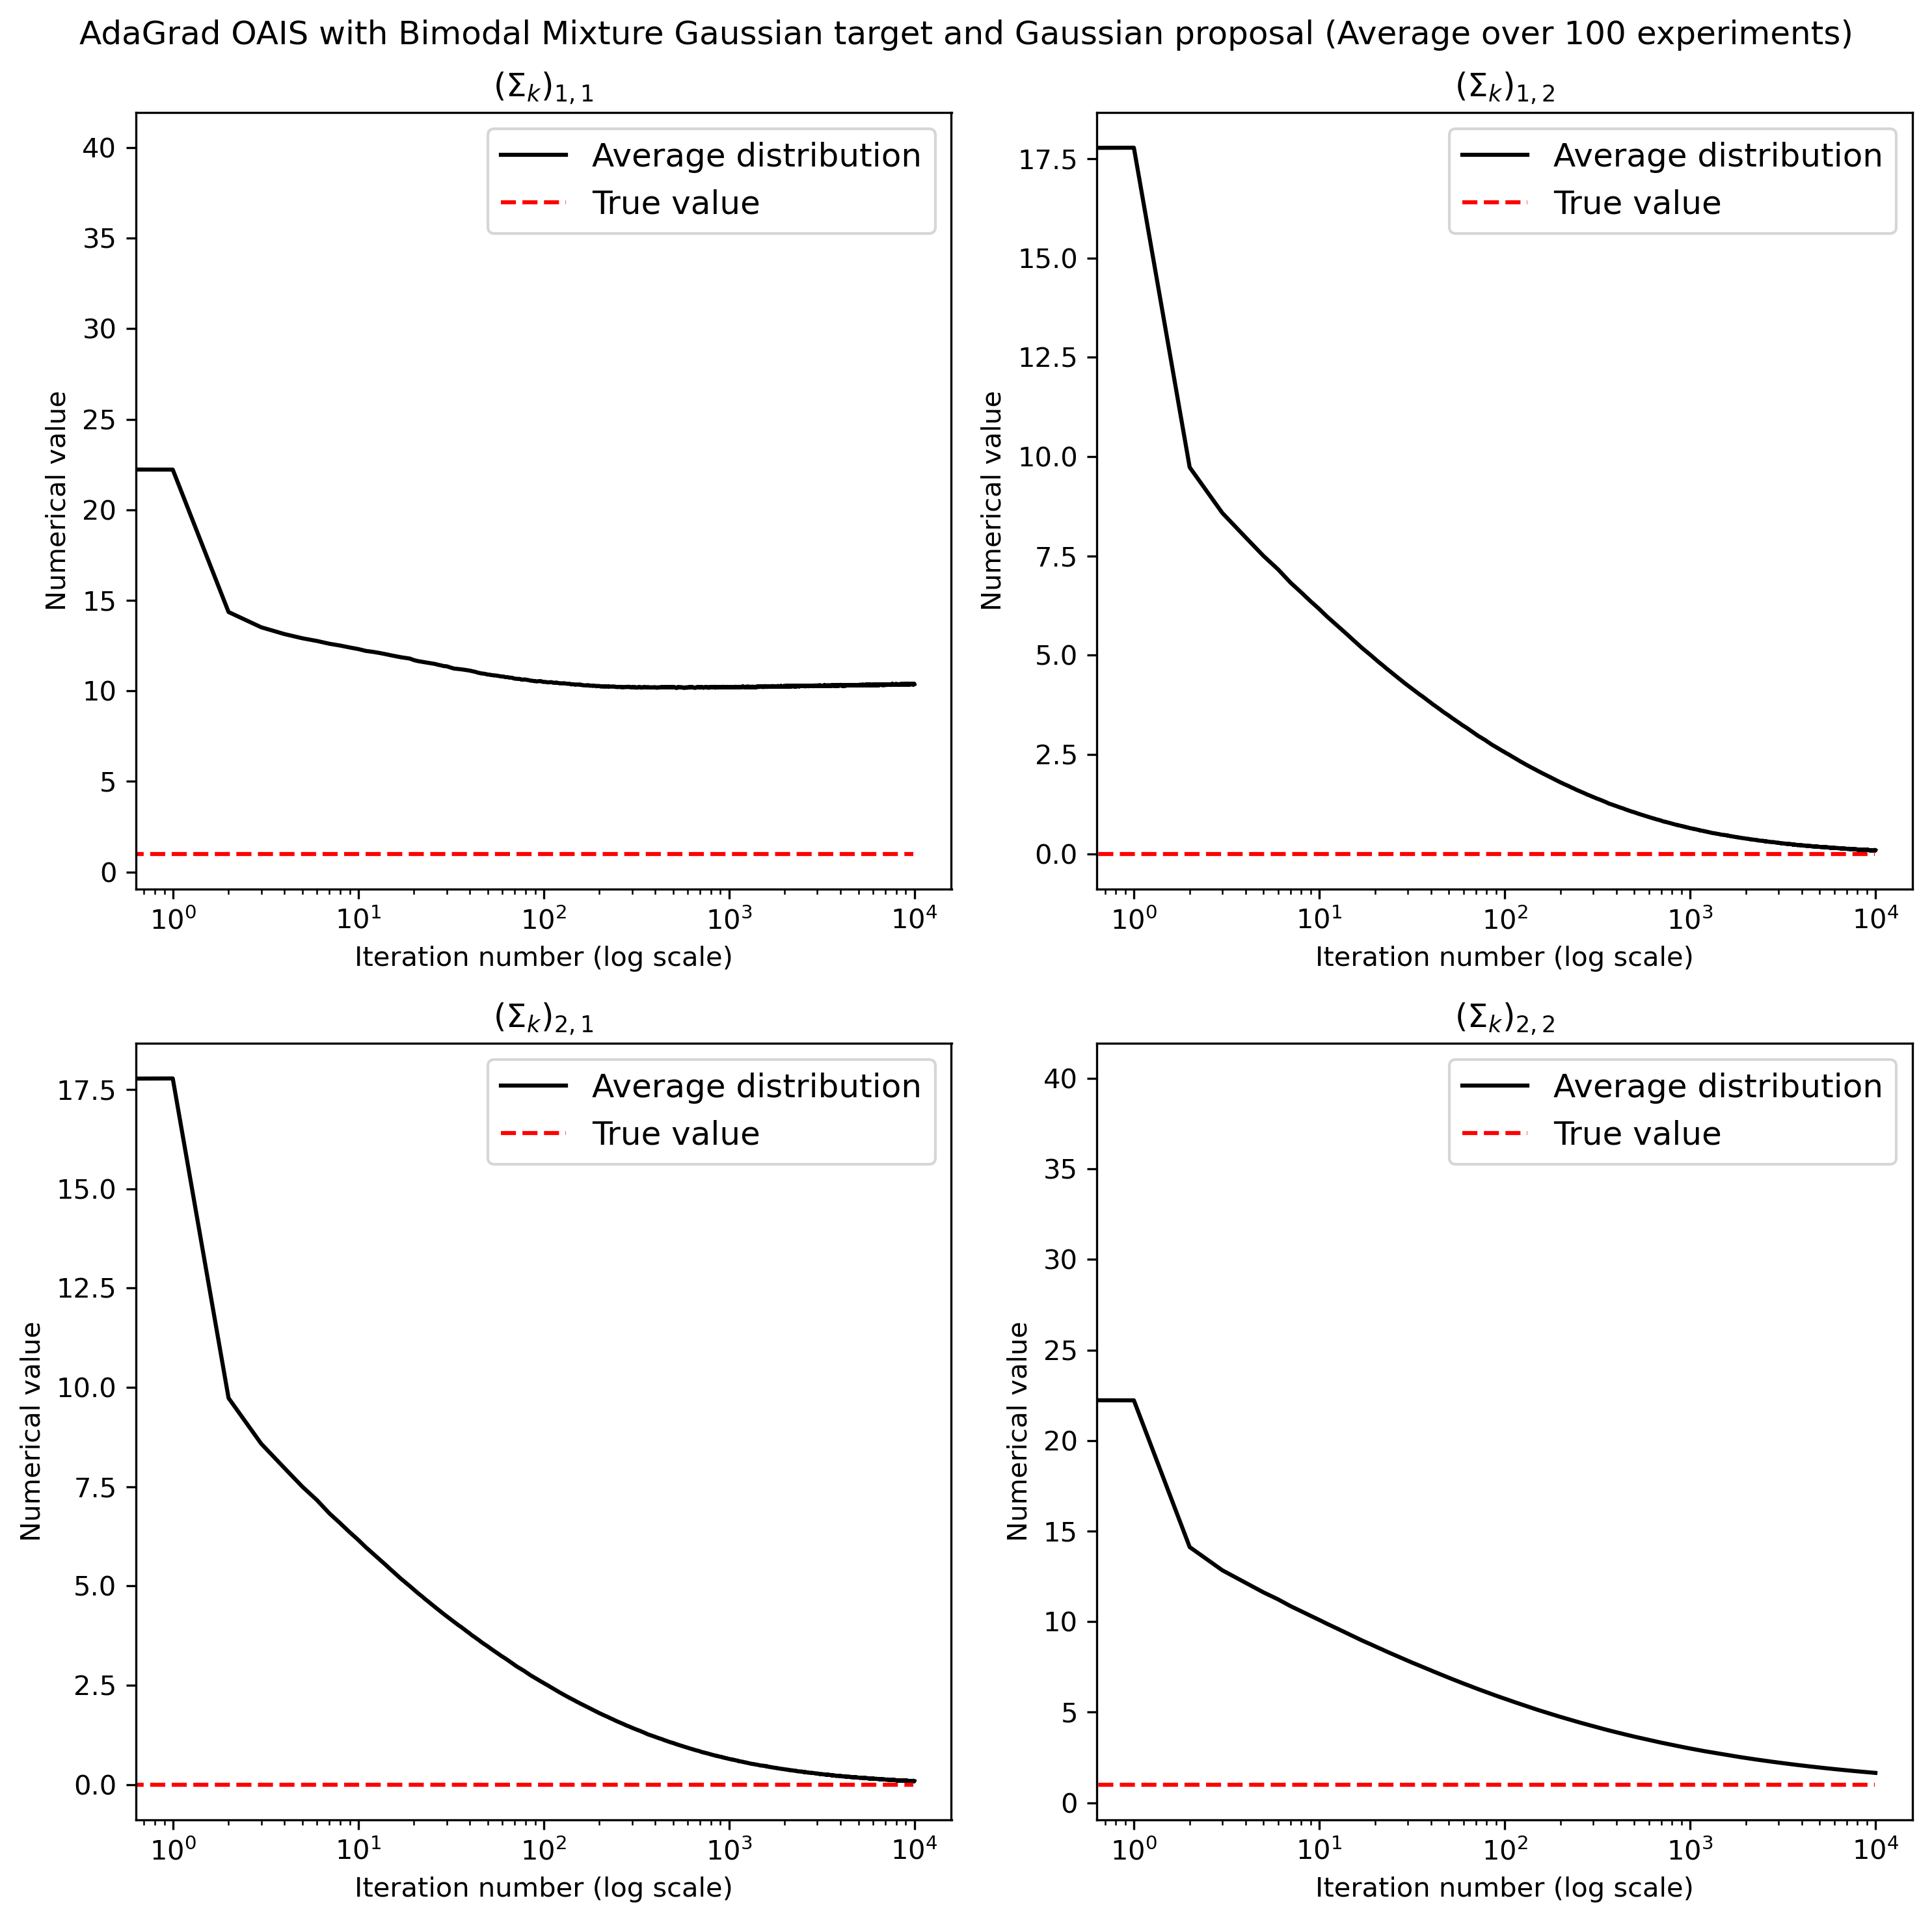

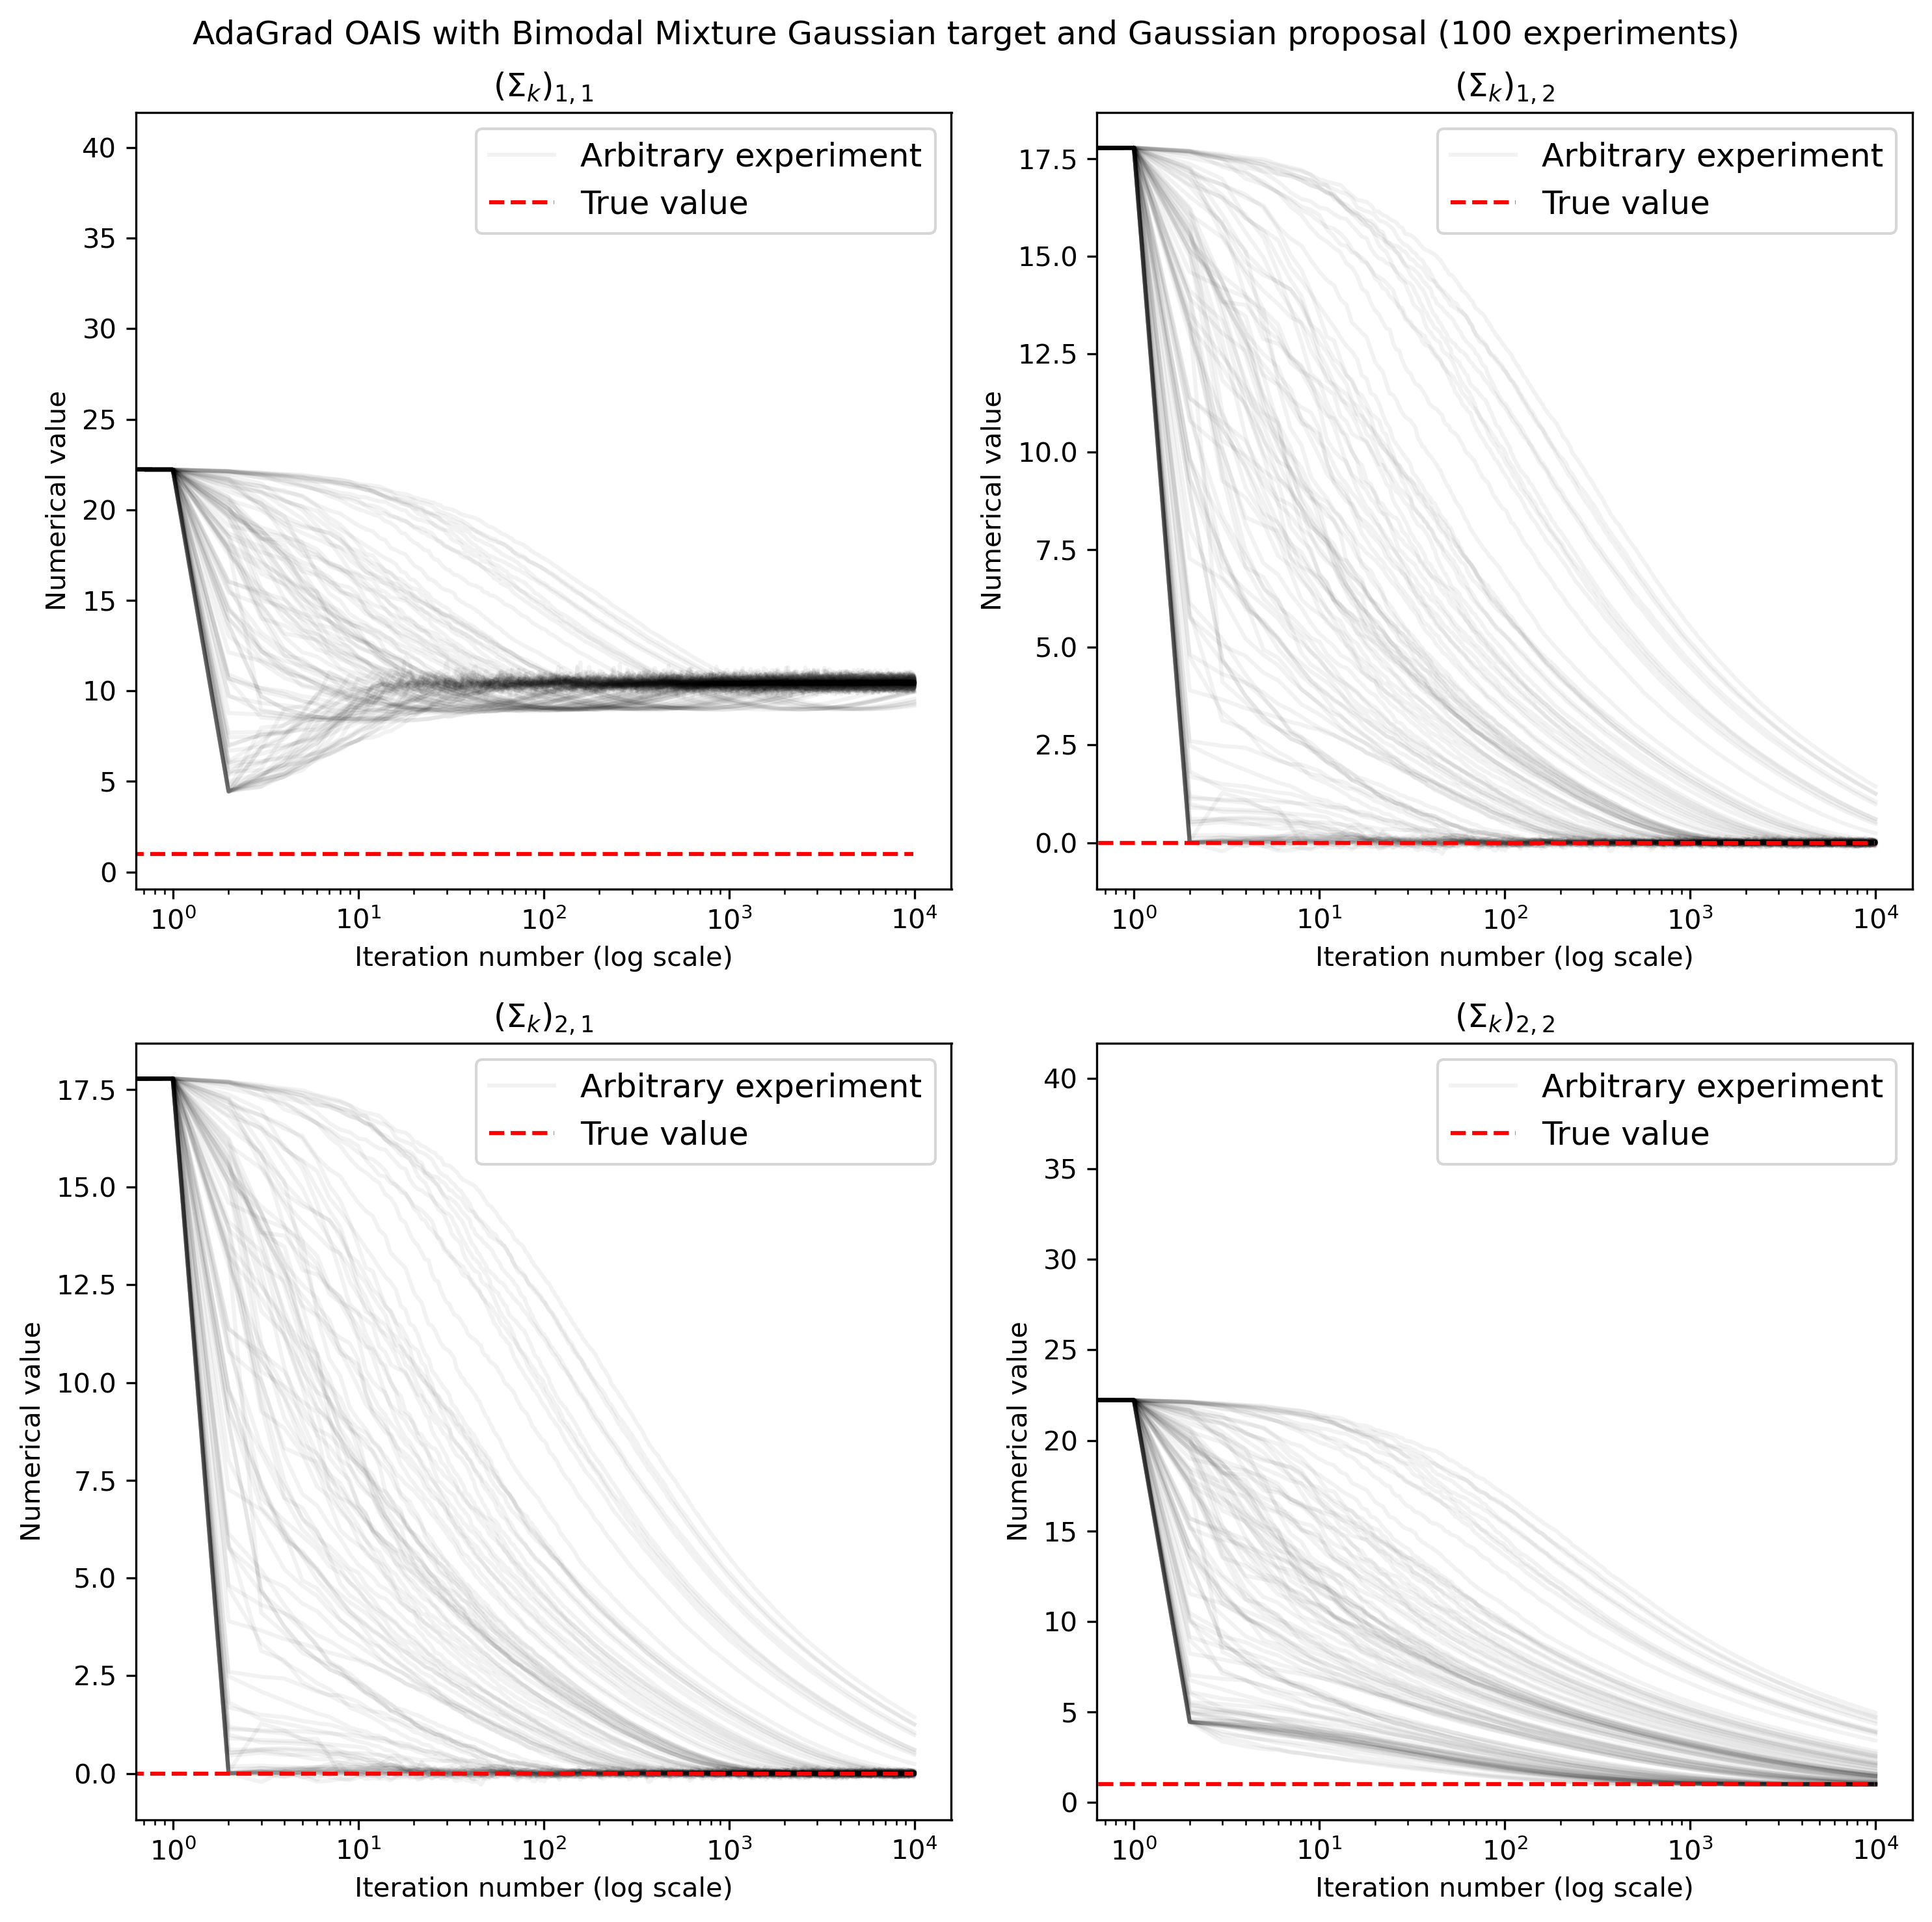

In [59]:
optimiser = "AdaGrad"
for kind in ["mean", "cov"]:
    for average in [True, False]:
        if average:
            title = f"{optimiser} OAIS with Bimodal Mixture Gaussian target and Gaussian proposal (Average over {nexperiments} experiments)"
        else:
            title = f"{optimiser} OAIS with Bimodal Mixture Gaussian target and Gaussian proposal ({nexperiments} experiments)"
        plotter(distribution_array_AdaGrad, pi, title=title, kind=kind, average=average, mix=True, alpha=0.05)
        plt.savefig(f"/Users/carlosperello/Desktop/M3R/figs/mixture/{optimiser}/{optimiser}_{kind}_avg_{average}.png")


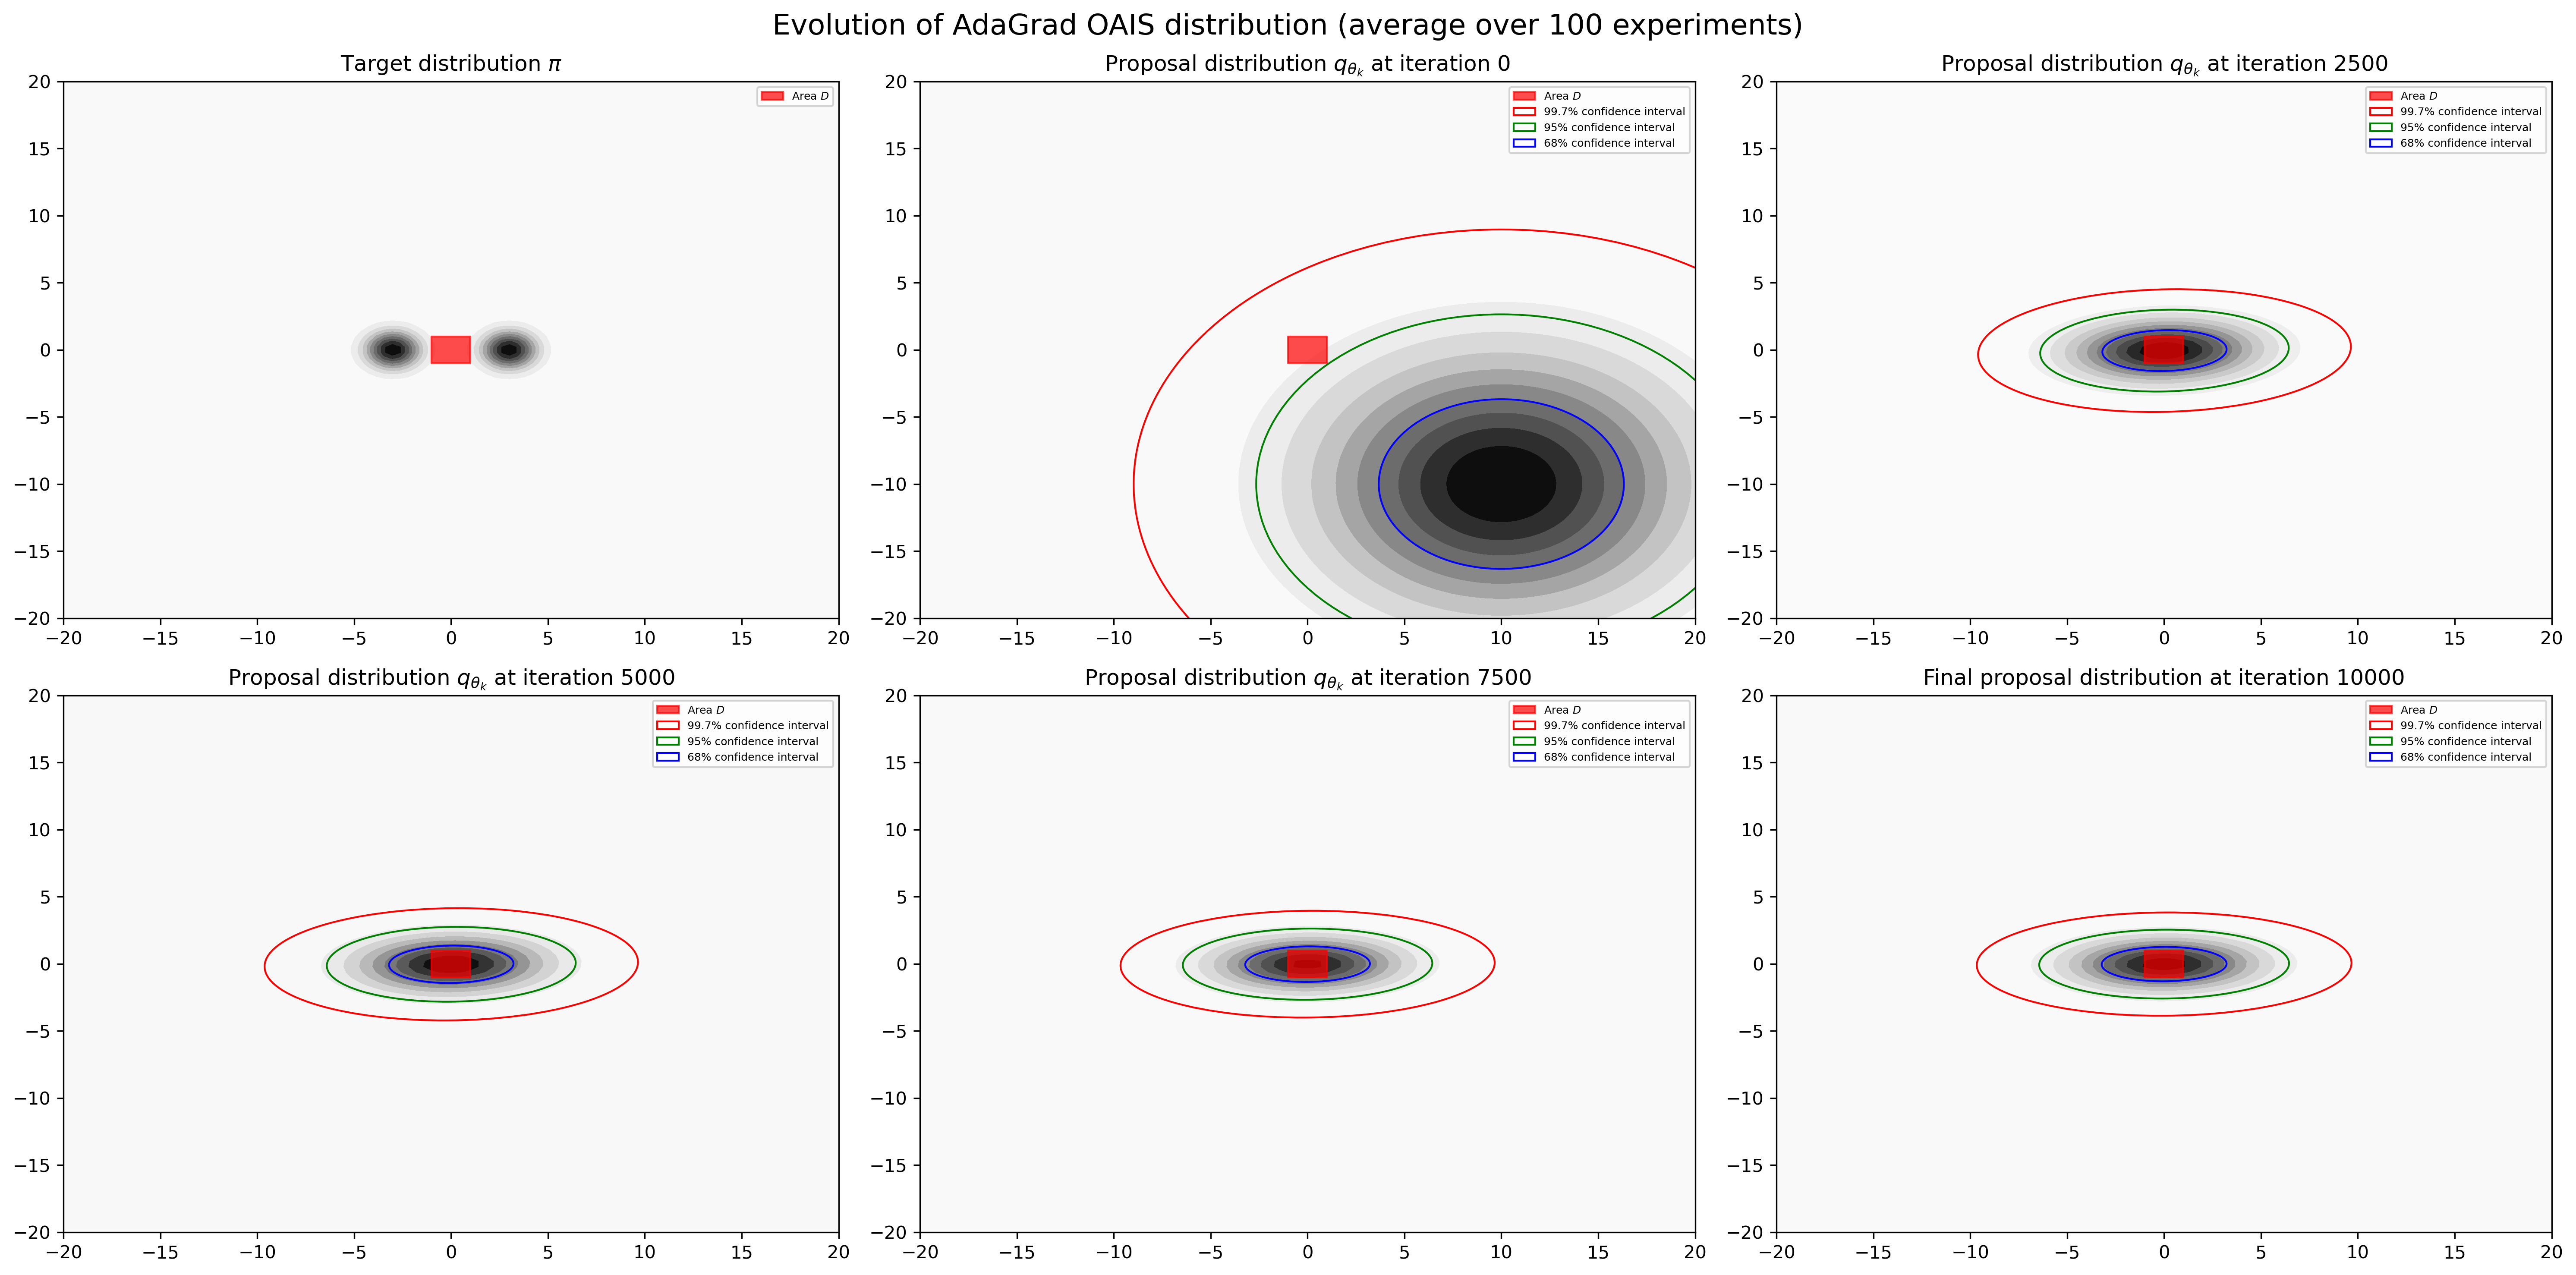

In [60]:
plot_contours(distribution_array_AdaGrad, pi, title=f"Evolution of {optimiser} OAIS distribution (average over {nexperiments} experiments)", mix=True)
plt.savefig(f"/Users/carlosperello/Desktop/M3R/figs/mixture/{optimiser}/{optimiser}_contours.png")

In [61]:
N_mc = int(1e6)
samples = pi.sample(N_mc)
GT = np.mean(phi(samples))

In [62]:
GT = 0.015574

0.015622

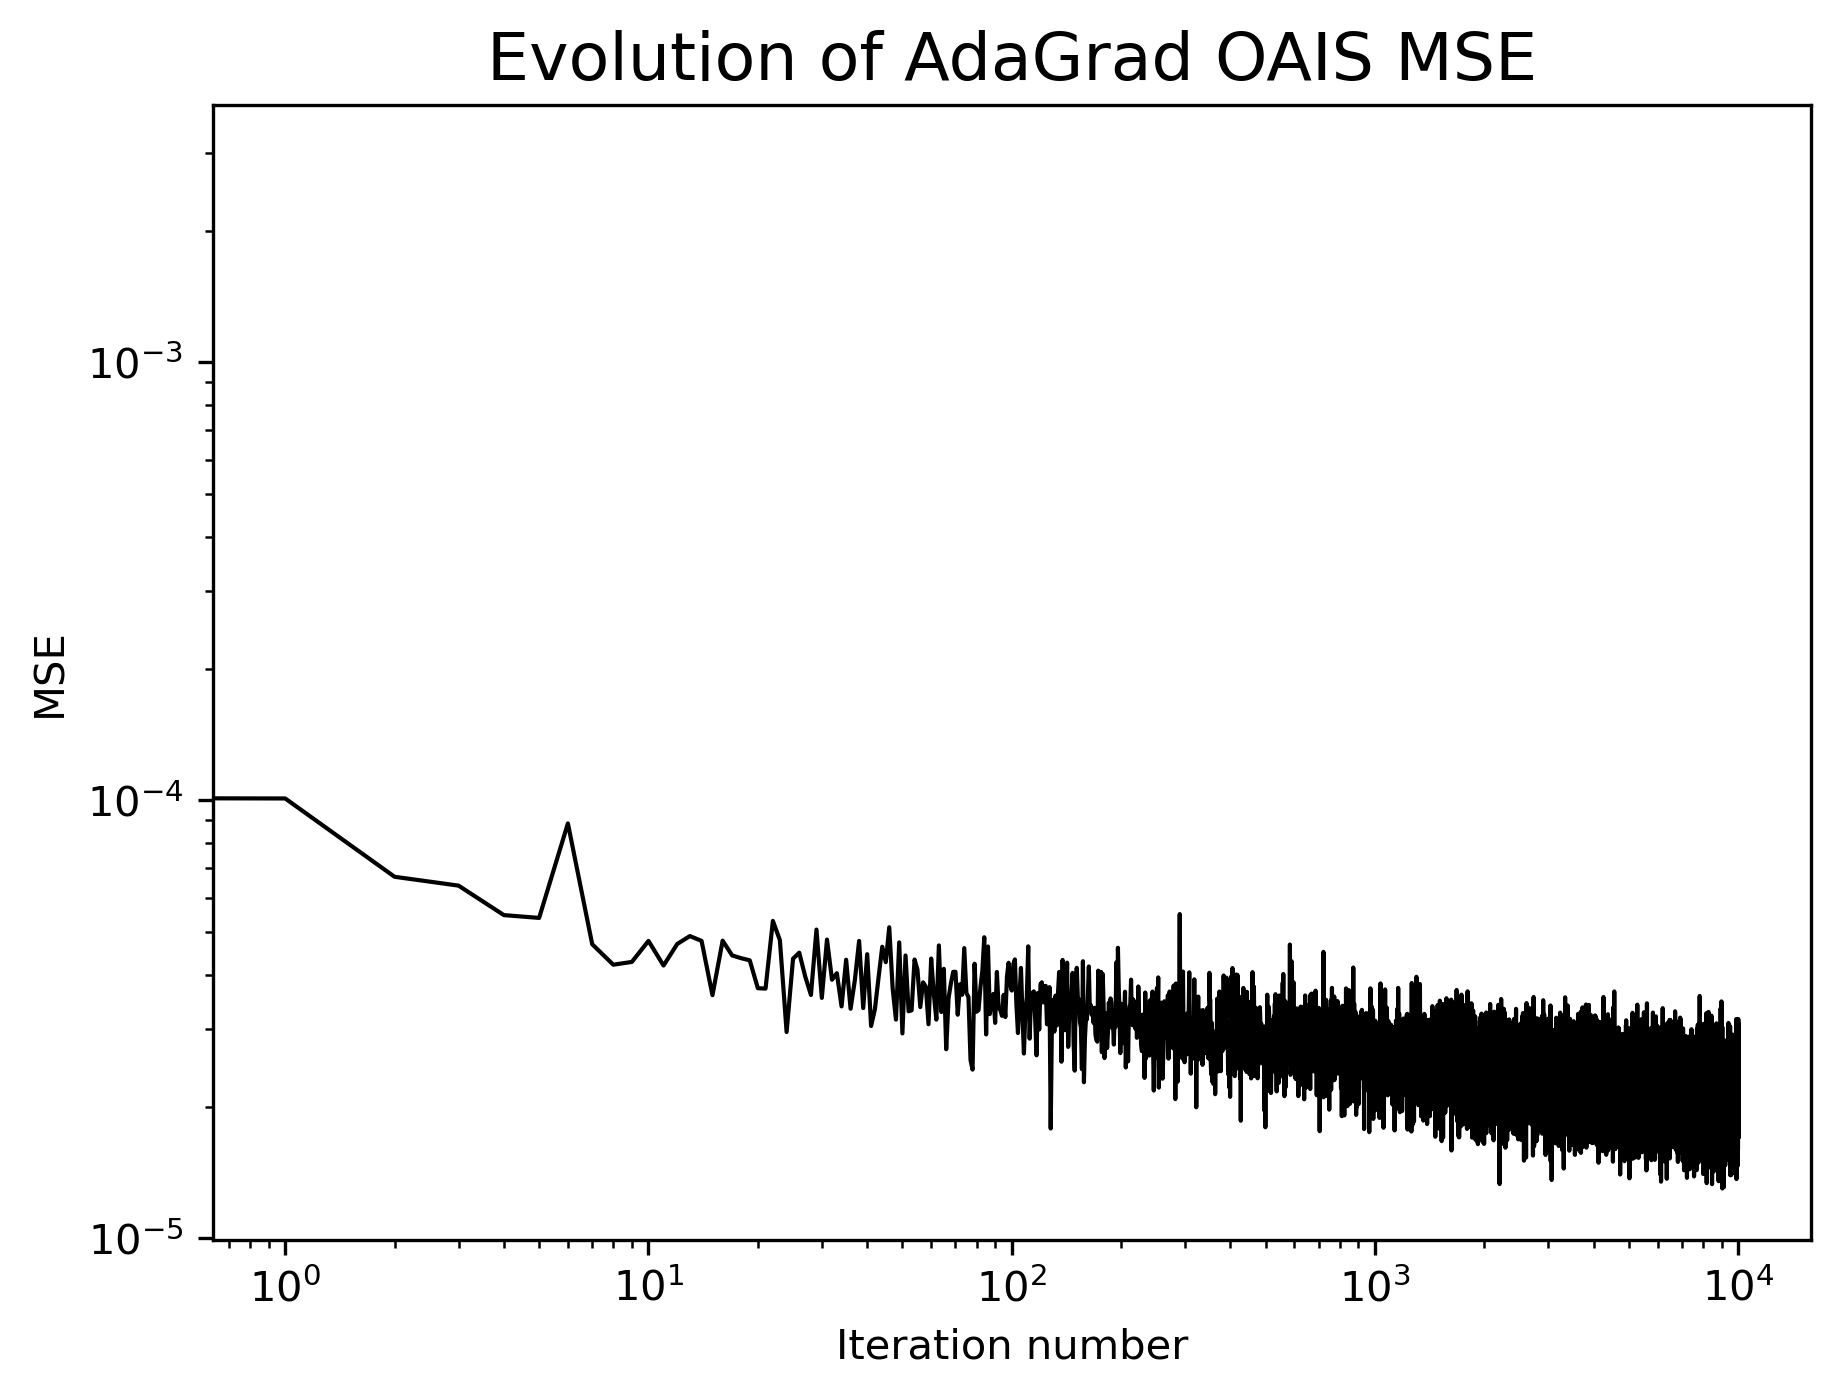

In [74]:
import nsimpkg.plotting
# import reload function from importlib
from importlib import reload
reload(nsimpkg.plotting)
from nsimpkg.plotting import plot_mse
plot_mse(results_array_AdaGrad, GT, title=f"Evolution of {optimiser} OAIS MSE (average over {nexperiments} experiments)")
plt.title(f"Evolution of {optimiser} OAIS MSE", fontsize=16)
plt.xscale("log")
plt.yscale("log")

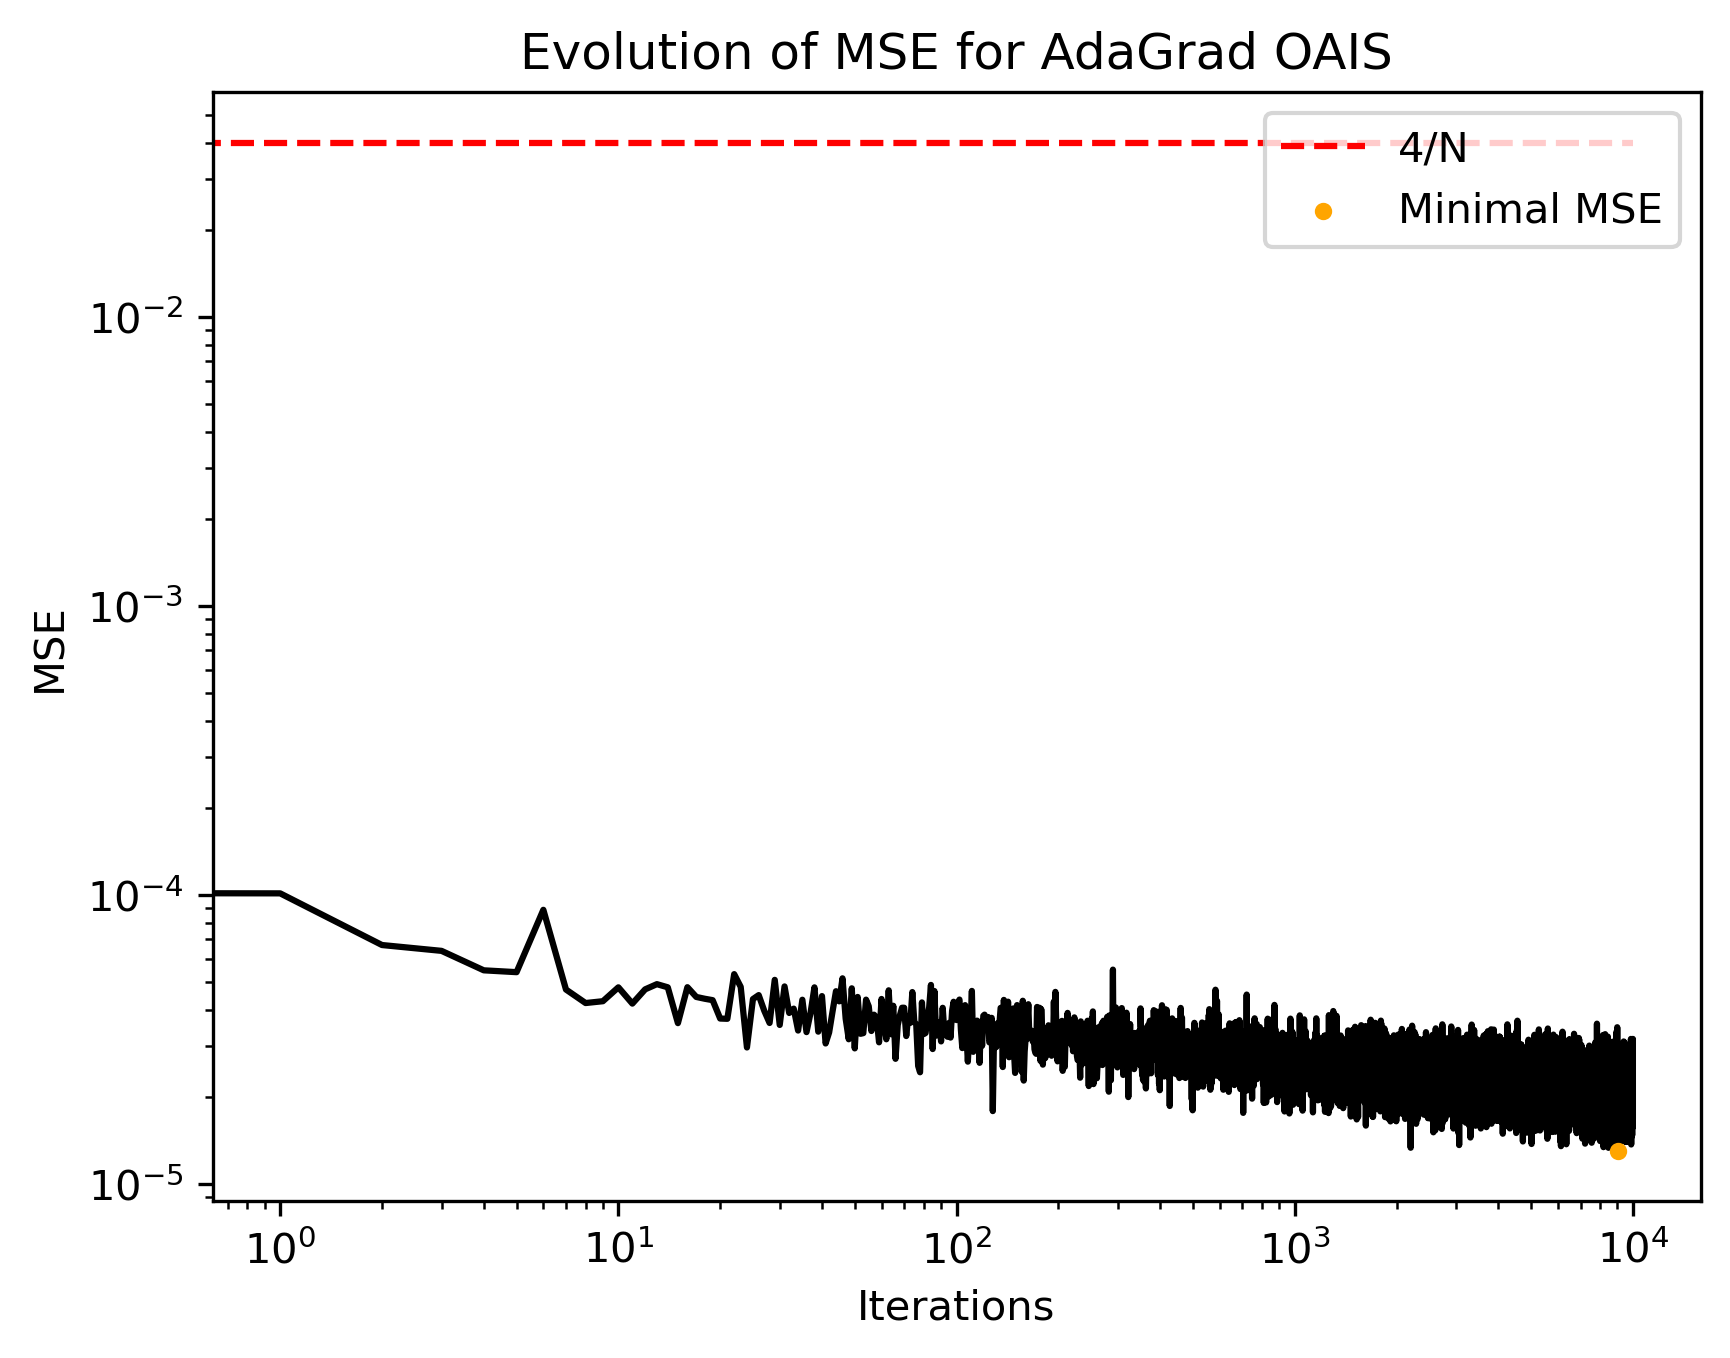

In [64]:
mse_arr = (np.array(results_array_AdaGrad) - GT)**2
plt.plot(np.mean(mse_arr, axis=0), color="black")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.title(f"Evolution of MSE for {optimiser} OAIS")
plt.hlines(4/N, 0, Niter, linestyle="--", color="red", label="4/N")
# add dot at minimal MSE
plt.scatter(np.argmin(np.mean(mse_arr, axis=0)), np.min(np.mean(mse_arr, axis=0)), color="orange", label="Minimal MSE", zorder=10, s=10)
plt.legend()
plt.show()